<a href="https://colab.research.google.com/github/Vektor79/Zadania_samodzielne/blob/main/kaggle_video_game_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Przesłanie do środowiska wykonawczego pliku ze zbiorem danych, którego będziemy używać. Skorzystamy ze zbioru vgsales.csv, który możesz pobrać: [https://www.kaggle.com/datasets/gregorut/videogamesales]

Znaczenie poszczególnych kolumn:

* **Rank** - pozycja w rankingu sprzedaży
* **Name** - nazwa gry
* **Platform** - platforma, na której dostępna jest gra
* **Year** - rok wydania
* **Genre** - gatunek gry
* **Publisher** - wydawca
* **NA_Sales** - wielkość sprzedaży w Ameryce Północnej
* **EU_Sales** - wielkość sprzedaży w Europie
* **JP_Sales** - wielkość sprzedaży w Japonii
* **Other_Sales** - wielkość sprzedaży w pozostałych krajach
* **Global Sales** - wielkość sprzedaży na świecie


Do naszej wizualizacji będą potrzebne nam trzy kolumny:
Global_Sales, Genre i Year


                 Global_Sales
Genre    Year                
Action   1980.0          0.34
         1981.0         14.84
         1982.0          6.52
         1983.0          2.86
         1984.0          1.85
...                       ...
Strategy 2012.0          3.33
         2013.0          6.33
         2014.0          0.99
         2015.0          1.82
         2016.0          0.50

[389 rows x 1 columns]


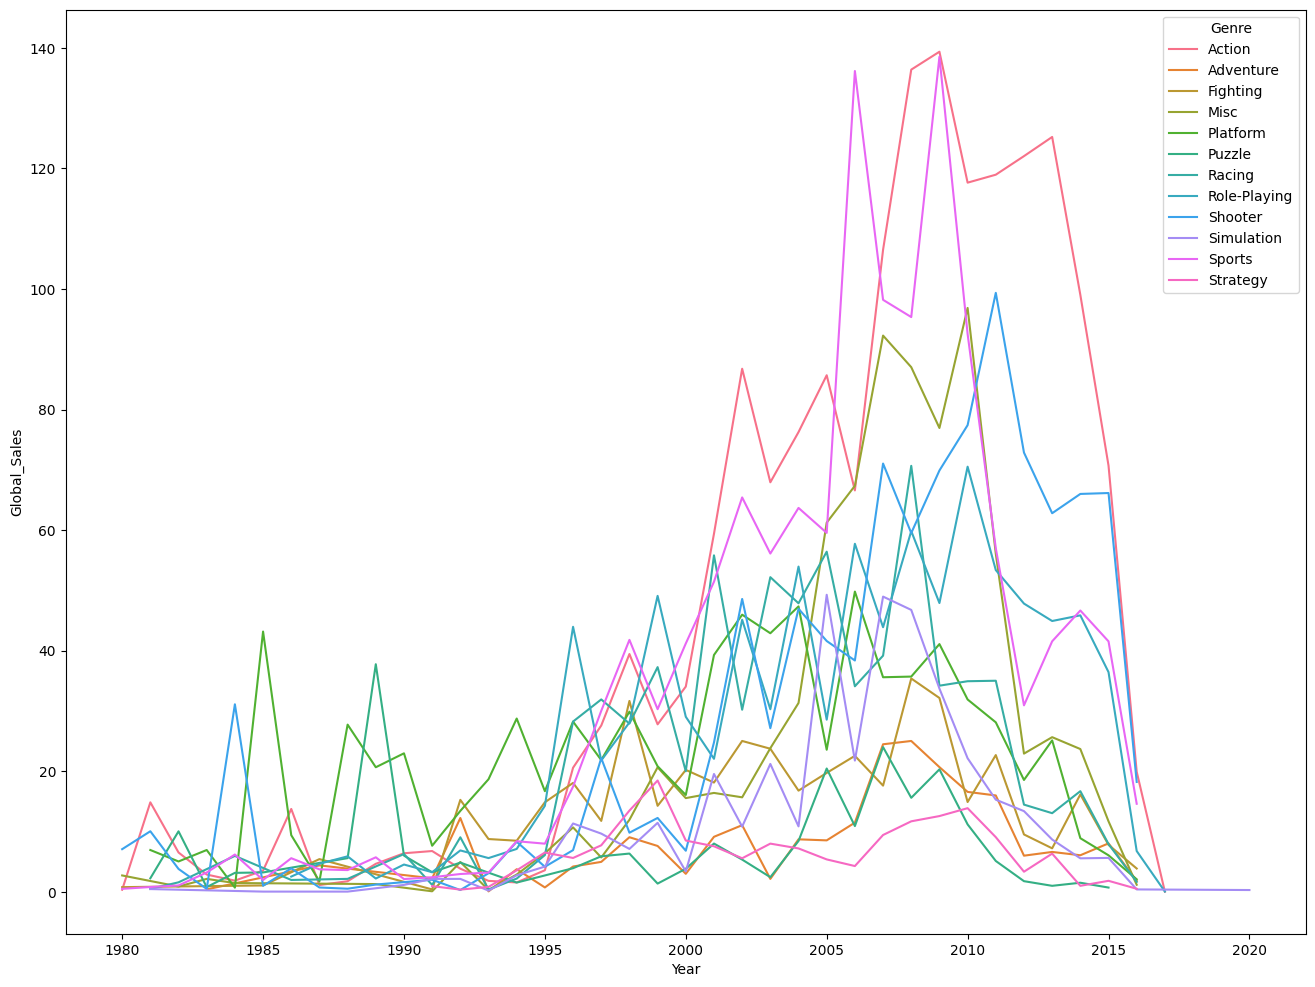

In [25]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# from google.colab import files    # wyświetli przycisk do przesłania pliku z mojego komputera
# uploaded = files.upload()

# from google.colab import drive
# drive.mount('/content/drive')


videogames_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coders_Lab_Prework/kaggle_video_game_sales/vgsales.csv')

# wybieram tylko trzy kolumny:
videogames_df = videogames_df[['Global_Sales', 'Genre', 'Year']]
videogames_df.head(10)

# gatunki gier:
genres = videogames_df['Genre'].unique()
videogames_df = videogames_df[videogames_df['Genre'].isin(genres)]

# grupowanie danych po gatunku i roku wydania gry oraz wyliczenie sumy sprzedaży na świecie:
videogames_df_groupped = videogames_df.groupby(['Genre', 'Year']).agg('sum')
print(videogames_df_groupped)

# definiuję paletę kolorów
colors = ['#297bb3',
          '#657bc6',
          '#a076ca',
          '#d56cbc',
          '#fe659d',
          '#ff6d75',
          '#ff8547',
          '#ffa600'
          ]
colors_palette = sns.set_palette(sns.color_palette(colors))

# generowanie wykresu:
plt.figure(figsize=(16, 12))
sales_plot = sns.lineplot(x='Year', y='Global_Sales', hue='Genre', palette=colors_palette, errorbar=None, data=videogames_df_groupped)

In [ ]:
# Find the top 10 games by global sales
top_10_games = videogames_df.nlargest(10, 'Global_Sales')

print(top_10_games[['Global_Sales', 'Genre', 'Year']])


   Global_Sales         Genre    Year
0         82.74        Sports  2006.0
1         40.24      Platform  1985.0
2         35.82        Racing  2008.0
3         33.00        Sports  2009.0
4         31.37  Role-Playing  1996.0
5         30.26        Puzzle  1989.0
6         30.01      Platform  2006.0
7         29.02          Misc  2006.0
8         28.62      Platform  2009.0
9         28.31       Shooter  1984.0
